# **Introducción a Redes Neuronales --- Tarea 3: Adaline**

*Autor: David Segura Carnet #13-11341*,
24/06/2020

### Parte 1: Implementación Adaline

In [ ]:
import numpy as np
import random 

# Clase Adaline

# Inicializacion: lowRandom -> Valor minimo del rango de los valores a generar en la matriz de pesos
#                 highRandom -> Valor maximo del rango de los valores a generar en la matriz de pesos
#                 numAdaline -> Dimension de la matriz de peso correspondiente a los adalines de la red
#                 dimData_with_bias -> Dimension de la matriz de peso correspondiente a la dimension de datos

class adaline:
  def __init__(self, lowRandom, highRandom, numAdaline, dimData_with_bias):
    # Inicializacion de la matriz de los pesos incluyendo el bias: La matriz se inicializara
    # ya traspuesta por la definicion que tiene en las dimensiones.
    self.w = np.random.uniform(low=lowRandom, high=highRandom, size=(numAdaline,dimData_with_bias))

  # Funcion Propagacion

  # Argumentos: data -> Vector con los datos a procesar
  #             funcion_activacion -> Funcion con la que se activaran los adalines

  def propagacion(self, data, funcion_activacion):
    # Se le incluye al vector de los datos el valor de 1 para la representacion
    # del sesgo, y luego se realiza el producto punto entre la matriz de pesos
    # y el vector de datos, donde despues se realiza la activacion y se retorna
    # la salida "y"
    dataMod = np.insert(data, 0, 1, axis=0)
    estimulo = np.dot(self.w, dataMod)
    return [funcion_activacion(i) for i in estimulo]
  
  # Funcion Actualizacion

  # Argumentos: etha -> Tasa de aprendizaje
  #             error -> Error resultante en caso de que el dato haya sido mal clasificado
  #             data -> Vector con los datos a procesar

  def actualizacion(self, etha, error, data):
    # Se le incluye al vector de los datos el valor de 1 para la representacion
    # del sesgo, y luego se realiza la respectiva actualizacion de pesos
    dataMod = np.insert(data, 0, 1, axis=0)
    self.w += etha * np.outer(error,dataMod)

  # Funcion RNA_Training

  # Argumentos: data -> Vector con los datos a procesar
  #             etha -> Tasa de aprendizaje
  #             maxEpochs -> Limite maximo de epocas a entrenar 
  #             funcion_activacion -> Funcion con la que se activaran los adalines
  #             d -> Funcion que retorna el vector de valor esperado de un dato

  # Retorno: log_precision -> Arreglo donde cada indice representa una epoca  
  #                           y su valor la precision obtenida en la misma
  #          log_emc -> Arreglo donde cada indice representa una epoca y su
  #                     valor el error medio cuadratico obtenida en la misma

  def training(self, data, etha, maxEpochs, funcion_activacion, d):
    # Se realiza el entrenamiento de la red mediante la actualizacion de los 
    # de los pesos si se clasifica mal un dato, donde estos datos del vector data
    # se reordenan al comienzo de cada epoca y luego se subdividen en x[0] para 
    # el valor esperado y x[1:] para los demas atributos de los datos.
    print("Entrenamiento")
    epochs = 0
    log_precision = []
    log_emc = []
    while epochs <= maxEpochs:
      emc_total = 0
      np.random.shuffle(data) #  Reordenamiento de los datos aleatorios
      for x in data:
        y = self.propagacion(x[1:],funcion_activacion)
        error = np.subtract(d(x[0]),y)
        emc_total += np.dot(error,error) / 2 # Error Medio Cuadratico
        self.actualizacion(etha, error, x[1:])
      print("EPOCA: "+ str(epochs))
      log_precision.append(self.predict(data,funcion_activacion,d))
      log_emc.append(emc_total/len(data)) # Para Calcular la grafica del error medio cuadratico
      epochs += 1
    return log_precision, log_emc
  
  # Funcion Predict

  # Argumentos: data -> Vector con los datos a procesar
  #             funcion_activacion -> Funcion con la que se activaran los adalines
  #             d -> Funcion que retorna el vector de valor esperado de un dato

  # Retorno: precision -> Retorna la precision de los datos clasificados

  def predict(self, data, funcion_activacion, d):
    # Se realiza ya la prediccion de los datos usando la funcion propagacion
    # y retornara la precision de la red en clasificar los datos.
    try:
      contador = 0
      for x in data:
        y_translate = [0,0,0,0,0,0,0,0,0,0]
        y = self.propagacion(x[1:],funcion_activacion)
        index = np.where(y == np.amax(y))
        y_translate[index[0][0]] = 1
        if np.array_equal(y_translate, d(x[0])) == False:
          contador += 1
      return 100 * (len(data) - contador) / len(data)
    except:
      return 0

In [ ]:
# Clase Perceptron

# Inicializacion: lowRandom -> Valor minimo del rango de los valores a generar en la matriz de pesos
#                 highRandom -> Valor maximo del rango de los valores a generar en la matriz de pesos
#                 numPerceptron -> Dimension de la matriz de peso correspondiente a los perceptrones de la red
#                 dimData_with_bias -> Dimension de la matriz de peso correspondiente a la dimension de datos

class perceptron:
  def __init__(self, lowRandom, highRandom, numPerceptron, dimData_with_bias):
    # Inicializacion de la matriz de los pesos incluyendo el bias: La matriz se inicializara
    # ya traspuesta por la definicion que tiene en las dimensiones.
    self.w = np.random.uniform(low=lowRandom, high=highRandom, size=(numPerceptron,dimData_with_bias))

  # Funcion Propagacion

  # Argumentos: data -> Vector con los datos a procesar
  #             funcion_activacion -> Funcion con la que se activaran los perceptrones

  def propagacion(self, data, funcion_activacion):
    # Se le incluye al vector de los datos el valor de 1 para la representacion
    # del sesgo, y luego se realiza el producto punto entre la matriz de pesos
    # y el vector de datos, donde despues se realiza la activacion y se retorna
    # la salida "y"
    dataMod = np.insert(data, 0, 1, axis=0)
    estimulo = np.dot(self.w, dataMod)
    return [funcion_activacion(i) for i in estimulo]
  
  # Funcion Actualizacion

  # Argumentos: etha -> Tasa de aprendizaje
  #             error -> Error resultante en caso de que el dato haya sido mal clasificado
  #             data -> Vector con los datos a procesar

  def actualizacion(self, etha, error, data):
    # Se le incluye al vector de los datos el valor de 1 para la representacion
    # del sesgo, y luego se realiza la respectiva actualizacion de pesos
    dataMod = np.insert(data, 0, 1, axis=0)
    self.w += etha * np.outer(error,dataMod)

  # Funcion RNA_Training

  # Argumentos: data -> Vector con los datos a procesar
  #             etha -> Tasa de aprendizaje
  #             maxEpochs -> Limite maximo de epocas a entrenar 
  #             funcion_activacion -> Funcion con la que se activaran los perceptrones
  #             d -> Funcion que retorna el vector de valor esperado de un dato

  def training(self, data, etha, maxEpochs, funcion_activacion, d):
    # Se realiza el entrenamiento de la red mediante la actualizacion de los 
    # de los pesos si se clasifica mal un dato, donde estos datos del vector data
    # se reordenan al comienzo de cada epoca y luego se subdividen en x[0] para 
    # el valor esperado y x[1:] para los demas atributos de los datos.
    print("Entrenamiento")
    cambio = True
    epochs = 0
    log_precision = []
    while cambio and epochs <= maxEpochs:
      cambio = False
      np.random.shuffle(data) #  Reordenamiento de los datos aleatorios
      for x in data:
        y = self.propagacion(x[1:],funcion_activacion)
        error = np.subtract(d(x[0]),y)
        if np.array_equal(error, np.zeros(len(error))) == False:
          cambio = True
          self.actualizacion(etha, error, x[1:])
      print("EPOCA: "+ str(epochs))
      log_precision.append(self.predict(data, funcion_activacion, d))
      epochs += 1
    return log_precision
  
  # Funcion Predict

  # Argumentos: data -> Vector con los datos a procesar
  #             funcion_activacion -> Funcion con la que se activaran los perceptrones
  #             d -> Funcion que retorna el vector de valor esperado de un dato

  def predict(self, data, funcion_activacion, d):
    # Se realiza ya la prediccion de los datos usando la funcion propagacion
    # y retornara la precision de la red en clasificar los datos.
    contador = 0
    for x in data:
      y = self.propagacion(x[1:],funcion_activacion)
      if np.array_equal(y, d(x[0])) == False:
        contador += 1
    return 100 * (len(data) - contador) / len(data)

# Definimos las funciones d y de activacion a usar

def d_perceptron(x):
  value = [0,0,0,0,0,0,0,0,0,0]
  value[int(x)] = 1
  return value

def umbral(x):
  if x >= 0:
    return 1
  else:
    return 0

### Parte 2: Clasificación de Dígitos con Adaline

Se entrenaran 10 adalines que en conjunto puedan clasificar los dígitos en la base de datos MNIST. Cada ejemplo es una imagen de 28x28 pixels y cada pixel es un valor en la escala de grises ( en el intervalo [0,255]). La arquitectura del adaline de una capa constará de:


> (a) capa de 785 entradas, que corresponden a los 28x28 elementos de la imagen + la previsión del sesgo.


> (b) 10 adalines con función de activación identidad.

La respuesta deseada de cada ejemplo será un vector canónico que tendrá el valor de 1 en la posición de la neurona que representa el dígito. Así el dígito ’0’ tendrá respuesta deseada de (1,0,0,0,0,0,0,0,0,0), mientras que el dígito 2 tiene respuesta deseada (0,0,1,0,0,0,0,0,0,0).

Entrene el adaline inicializando los pesos en el intervalo [-0.05, 0.05] y entrene por 50 épocas usando los valores de η = 0.001, 0.01, y 0.1. Calcule con los datos de prueba el porcentaje de clasificaciones correctas para cada tasa de aprendizaje y discuta los resultados obtenidos con las distintas tasas de aprendizaje.

Ayuda: Previo al entrenamiento se sugiere escalar los datos (divida por 255) y al entrenar reordene los datos para que la presentación sea aleatoria.

#### PD: EL ANALISIS DE LAS GRAFICAS SE ENCUENTRA EN EL PDF ADJUNTO

In [ ]:
from google.colab import drive

# En caso de no usar Google Colab, eliminar la importacion de la libreria y el mount,
# Y modificar las rutas correspondientes de los archivos a cargar
drive.mount('/content/drive')

path_train = '/content/drive/My Drive/RNA/Tarea 2/mnist_train.csv'
path_test = '/content/drive/My Drive/RNA/Tarea 2/mnist_test.csv'

# Cargamos los datos y de una vez los escalamos dividiendo por 255
data_train = np.loadtxt(open(path_train, "rb"), delimiter=",", skiprows=0)
data_train = np.concatenate((np.transpose([data_train[0:,0]]), data_train[0:,1:]/255), axis=1)
data_test = np.loadtxt(open(path_test, "rb"), delimiter=",", skiprows=0)
data_test = np.concatenate((np.transpose([data_test[0:,0]]), data_test[0:,1:]/255), axis=1)

In [ ]:
# Definimos las funciones d y de activacion a usar

def d(x):
  value = [0,0,0,0,0,0,0,0,0,0]
  value[int(x)] = 1
  return value

def lineal(x):
  return x

[0] Adaline con Tasa de Aprendizaje  -> 0.001
Entrenamiento
EPOCA: 0
EPOCA: 1
EPOCA: 2
EPOCA: 3
EPOCA: 4
EPOCA: 5
EPOCA: 6
EPOCA: 7
EPOCA: 8
EPOCA: 9
EPOCA: 10
EPOCA: 11
EPOCA: 12
EPOCA: 13
EPOCA: 14
EPOCA: 15
EPOCA: 16
EPOCA: 17
EPOCA: 18
EPOCA: 19
EPOCA: 20
EPOCA: 21
EPOCA: 22
EPOCA: 23
EPOCA: 24
EPOCA: 25
EPOCA: 26
EPOCA: 27
EPOCA: 28
EPOCA: 29
EPOCA: 30
EPOCA: 31
EPOCA: 32
EPOCA: 33
EPOCA: 34
EPOCA: 35
EPOCA: 36
EPOCA: 37
EPOCA: 38
EPOCA: 39
EPOCA: 40
EPOCA: 41
EPOCA: 42
EPOCA: 43
EPOCA: 44
EPOCA: 45
EPOCA: 46
EPOCA: 47
EPOCA: 48
EPOCA: 49
EPOCA: 50
RESULTADOS PREDICT: 85.05


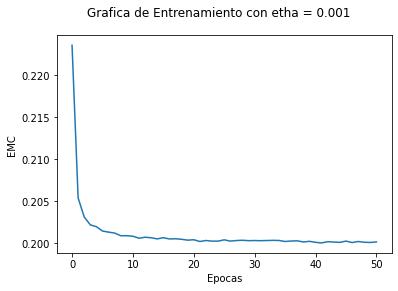

[0] Perceptron con Tasa de Aprendizaje  -> 0.001
Entrenamiento
EPOCA: 0
EPOCA: 1
EPOCA: 2
EPOCA: 3
EPOCA: 4
EPOCA: 5
EPOCA: 6
EPOCA: 7
EPOCA: 8
EPOCA: 9
EPOCA: 10
EPOCA: 11
EPOCA: 12
EPOCA: 13
EPOCA: 14
EPOCA: 15
EPOCA: 16
EPOCA: 17
EPOCA: 18
EPOCA: 19
EPOCA: 20
EPOCA: 21
EPOCA: 22
EPOCA: 23
EPOCA: 24
EPOCA: 25
EPOCA: 26
EPOCA: 27
EPOCA: 28
EPOCA: 29
EPOCA: 30
EPOCA: 31
EPOCA: 32
EPOCA: 33
EPOCA: 34
EPOCA: 35
EPOCA: 36
EPOCA: 37
EPOCA: 38
EPOCA: 39
EPOCA: 40
EPOCA: 41
EPOCA: 42
EPOCA: 43
EPOCA: 44
EPOCA: 45
EPOCA: 46
EPOCA: 47
EPOCA: 48
EPOCA: 49
EPOCA: 50
RESULTADOS  PREDICT: 76.5


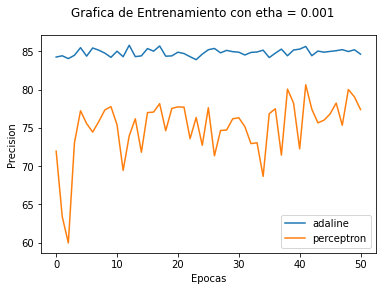

[1] Adaline con Tasa de Aprendizaje  -> 0.01
Entrenamiento
EPOCA: 0
EPOCA: 1
EPOCA: 2
EPOCA: 3
EPOCA: 4
EPOCA: 5
EPOCA: 6
EPOCA: 7
EPOCA: 8
EPOCA: 9
EPOCA: 10
EPOCA: 11
EPOCA: 12
EPOCA: 13
EPOCA: 14
EPOCA: 15
EPOCA: 16
EPOCA: 17
EPOCA: 18
EPOCA: 19
EPOCA: 20
EPOCA: 21
EPOCA: 22
EPOCA: 23
EPOCA: 24
EPOCA: 25
EPOCA: 26
EPOCA: 27
EPOCA: 28
EPOCA: 29
EPOCA: 30
EPOCA: 31
EPOCA: 32
EPOCA: 33
EPOCA: 34
EPOCA: 35
EPOCA: 36
EPOCA: 37
EPOCA: 38
EPOCA: 39
EPOCA: 40
EPOCA: 41
EPOCA: 42
EPOCA: 43
EPOCA: 44
EPOCA: 45
EPOCA: 46
EPOCA: 47
EPOCA: 48
EPOCA: 49
EPOCA: 50
RESULTADOS  PREDICT: 72.25


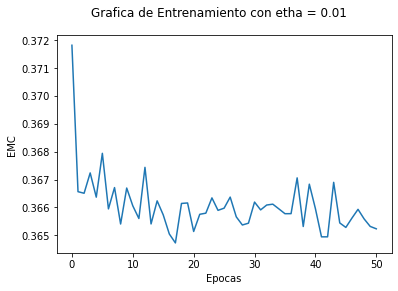

[1] Perceptron con Tasa de Aprendizaje  -> 0.01
Entrenamiento
EPOCA: 0
EPOCA: 1
EPOCA: 2
EPOCA: 3
EPOCA: 4
EPOCA: 5
EPOCA: 6
EPOCA: 7
EPOCA: 8
EPOCA: 9
EPOCA: 10
EPOCA: 11
EPOCA: 12
EPOCA: 13
EPOCA: 14
EPOCA: 15
EPOCA: 16
EPOCA: 17
EPOCA: 18
EPOCA: 19
EPOCA: 20
EPOCA: 21
EPOCA: 22
EPOCA: 23
EPOCA: 24
EPOCA: 25
EPOCA: 26
EPOCA: 27
EPOCA: 28
EPOCA: 29
EPOCA: 30
EPOCA: 31
EPOCA: 32
EPOCA: 33
EPOCA: 34
EPOCA: 35
EPOCA: 36
EPOCA: 37
EPOCA: 38
EPOCA: 39
EPOCA: 40
EPOCA: 41
EPOCA: 42
EPOCA: 43
EPOCA: 44
EPOCA: 45
EPOCA: 46
EPOCA: 47
EPOCA: 48
EPOCA: 49
EPOCA: 50
RESULTADOS  PREDICT: 71.94


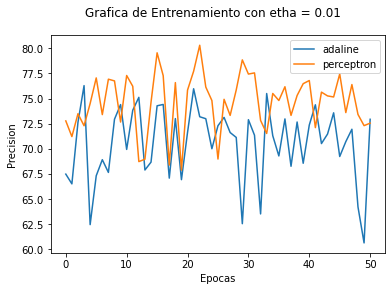

[2] Adaline con Tasa de Aprendizaje  -> 0.1
Entrenamiento


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:906: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)


EPOCA: 0
EPOCA: 1
EPOCA: 2
EPOCA: 3
EPOCA: 4
EPOCA: 5
EPOCA: 6
EPOCA: 7
EPOCA: 8
EPOCA: 9
EPOCA: 10
EPOCA: 11
EPOCA: 12
EPOCA: 13
EPOCA: 14
EPOCA: 15
EPOCA: 16
EPOCA: 17
EPOCA: 18
EPOCA: 19
EPOCA: 20
EPOCA: 21
EPOCA: 22
EPOCA: 23
EPOCA: 24
EPOCA: 25
EPOCA: 26
EPOCA: 27
EPOCA: 28
EPOCA: 29
EPOCA: 30
EPOCA: 31
EPOCA: 32
EPOCA: 33
EPOCA: 34
EPOCA: 35
EPOCA: 36
EPOCA: 37
EPOCA: 38
EPOCA: 39
EPOCA: 40
EPOCA: 41
EPOCA: 42
EPOCA: 43
EPOCA: 44
EPOCA: 45
EPOCA: 46
EPOCA: 47
EPOCA: 48
EPOCA: 49
EPOCA: 50
RESULTADOS  PREDICT: 0


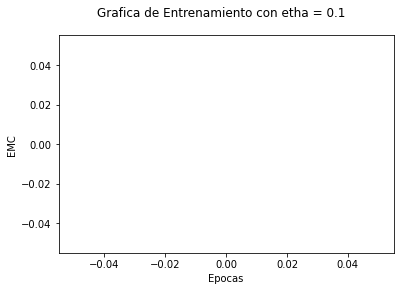

[2] Perceptron con Tasa de Aprendizaje  -> 0.1
Entrenamiento
EPOCA: 0
EPOCA: 1
EPOCA: 2
EPOCA: 3
EPOCA: 4
EPOCA: 5
EPOCA: 6
EPOCA: 7
EPOCA: 8
EPOCA: 9
EPOCA: 10
EPOCA: 11
EPOCA: 12
EPOCA: 13
EPOCA: 14
EPOCA: 15
EPOCA: 16
EPOCA: 17
EPOCA: 18
EPOCA: 19
EPOCA: 20
EPOCA: 21
EPOCA: 22
EPOCA: 23
EPOCA: 24
EPOCA: 25
EPOCA: 26
EPOCA: 27
EPOCA: 28
EPOCA: 29
EPOCA: 30
EPOCA: 31
EPOCA: 32
EPOCA: 33
EPOCA: 34
EPOCA: 35
EPOCA: 36
EPOCA: 37
EPOCA: 38
EPOCA: 39
EPOCA: 40
EPOCA: 41
EPOCA: 42
EPOCA: 43
EPOCA: 44
EPOCA: 45
EPOCA: 46
EPOCA: 47
EPOCA: 48
EPOCA: 49
EPOCA: 50
RESULTADOS  PREDICT: 74.11


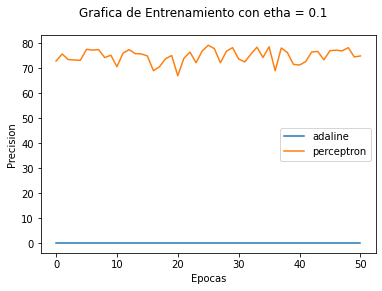

In [ ]:
import matplotlib.pyplot as plt

print("[0] Adaline con Tasa de Aprendizaje  -> 0.001")
adaline_0_001 = adaline(-0.05, 0.05, 10, len(data_train[0]))
adaline_precision_0_001, emc_0_001 = adaline_0_001.training(data_train, 0.001, 50, lineal, d)
adaline_predict_0_001 = adaline_0_001.predict(data_test, lineal, d)
print("RESULTADOS PREDICT: " + str(adaline_predict_0_001))
#EMC
plt.ylabel("EMC")
plt.xlabel("Epocas")
plt.suptitle('Grafica de Entrenamiento con etha = 0.001')
plt.plot(emc_0_001)
plt.show()

print("[0] Perceptron con Tasa de Aprendizaje  -> 0.001")
perceptron_0_001 = perceptron(-0.05, 0.05, 10, len(data_train[0]))
perceptron_precision_0_001 = perceptron_0_001.training(data_train, 0.001, 50, umbral, d_perceptron)
perceptron_predict_0_001 = perceptron_0_001.predict(data_test, umbral, d_perceptron)
print("RESULTADOS  PREDICT: " + str(perceptron_predict_0_001))
#Plot Precision
plt.ylabel("Precision")
plt.xlabel("Epocas")
plt.suptitle('Grafica de Entrenamiento con etha = 0.001')
plt.plot(adaline_precision_0_001, label='adaline')
plt.plot(perceptron_precision_0_001, label='perceptron')
plt.legend()
plt.show()

print("[1] Adaline con Tasa de Aprendizaje  -> 0.01")
adaline_0_01 = adaline(-0.05, 0.05, 10, len(data_train[0]))
adaline_precision_0_01, emc_0_01 = adaline_0_01.training(data_train, 0.01, 50, lineal, d)
adaline_predict_0_01 = adaline_0_01.predict(data_test, lineal, d)
print("RESULTADOS  PREDICT: " + str(adaline_predict_0_01))
#EMC
plt.ylabel("EMC")
plt.xlabel("Epocas")
plt.suptitle('Grafica de Entrenamiento con etha = 0.01')
plt.plot(emc_0_01)
plt.show()

print("[1] Perceptron con Tasa de Aprendizaje  -> 0.01")
perceptron_0_01 = perceptron(-0.05, 0.05, 10, len(data_train[0]))
perceptron_precision_0_01 = perceptron_0_01.training(data_train, 0.01, 50, umbral, d_perceptron)
perceptron_predict_0_01 = perceptron_0_01.predict(data_test, umbral, d_perceptron)
print("RESULTADOS  PREDICT: " + str(perceptron_predict_0_01))
#Plot
plt.ylabel("Precision")
plt.xlabel("Epocas")
plt.suptitle('Grafica de Entrenamiento con etha = 0.01')
plt.plot(adaline_precision_0_01, label='adaline')
plt.plot(perceptron_precision_0_01, label='perceptron')
plt.legend()
plt.show()

print("[2] Adaline con Tasa de Aprendizaje  -> 0.1")
adaline_0_1 = adaline(-0.05, 0.05, 10, len(data_train[0]))
adaline_precision_0_1, emc_0_1 = adaline_0_1.training(data_train, 0.1, 50, lineal, d)
adaline_predict_0_1 = adaline_0_1.predict(data_test, lineal, d)
print("RESULTADOS  PREDICT: " + str(adaline_predict_0_1))
#EMC
plt.ylabel("EMC")
plt.xlabel("Epocas")
plt.suptitle('Grafica de Entrenamiento con etha = 0.1')
plt.plot(emc_0_1)
plt.show()


print("[2] Perceptron con Tasa de Aprendizaje  -> 0.1")
perceptron_0_1 = perceptron(-0.05, 0.05, 10, len(data_train[0]))
perceptron_precision_0_1 = perceptron_0_1.training(data_train, 0.1, 50, umbral, d_perceptron)
perceptron_predict_0_1 = perceptron_0_1.predict(data_test, umbral, d_perceptron)
print("RESULTADOS  PREDICT: " + str(perceptron_predict_0_1))
#Plot
plt.ylabel("Precision")
plt.xlabel("Epocas")
plt.suptitle('Grafica de Entrenamiento con etha = 0.1')
plt.plot(adaline_precision_0_1, label='adaline')
plt.plot(perceptron_precision_0_1, label='perceptron')
plt.legend()
plt.show()

### Parte 3: Interpolador utilizando Adaline

Analizando la grafica de los datos y observando como se distribuyen en el plano, pude observar que la curva que pasa por dichos puntos se asemeja a la curva x^3 (como se mostrara en la grafica a generar).

Por ello se decidio probar con un polinomio de grado 3 y asi observar si el entrenamiento se aproxima mucho a la interpolacion deseada.

Un polinomio tiene la forma $p(x) = a_0 x^0 + a_1 x^1 + ... + a_n x^n$,  donde conocemos dos datos: $p(x)$ y $x$. Estos son los datos que necesitamos para entrenar nuestra red, donde $p(x)$ es nuestro valor deseado ($d$) y $x$ es nuestra entrada, en este caso como probaremos con un polinomio de grado 3, la entrada sera de tamaño 3 ($[x,x^2,x^3]$) y los coeficientes $a_i$ seran nuestros pesos donde $a_0$ representa el sesgo.

La escogencia que utilizaré para $\eta$ sera la que me ha dado mejores resultados en los anteriores experimentos (0.001). 

La grafica obteniendo el resultado se puede encontrar en el PDF adjunto.

In [ ]:
path_samples = '/content/drive/My Drive/RNA/Tarea 3/datosT3.csv'

data_samples = np.loadtxt(open(path_samples, "rb"), delimiter=",", skiprows=0)

In [ ]:
import numpy as np
import random 

class interpolador:
    def __init__(self, lowRandom, highRandom, numAdaline, dimData_with_bias):
      # Inicializacion de la matriz de los pesos incluyendo el bias: La matriz se inicializara
      # ya traspuesta por la definicion que tiene en las dimensiones.
      self.w = np.random.uniform(low=lowRandom, high=highRandom, size=(numAdaline,dimData_with_bias))

    def propagacion(self, data, funcion_activacion):
      # Se le incluye al vector de los datos el valor de 1 para la representacion
      # del sesgo, y luego se realiza el producto punto entre la matriz de pesos
      # y el vector de datos, donde despues se realiza la activacion y se retorna
      # la salida "y"
      dataMod = np.insert(data, 0, 1, axis=0)
      estimulo = np.dot(self.w, dataMod)
      return [funcion_activacion(i) for i in estimulo]

    def actualizacion(self, etha, error, data):
      # Se le incluye al vector de los datos el valor de 1 para la representacion
      # del sesgo, y luego se realiza la respectiva actualizacion de pesos
      dataMod = np.insert(data, 0, 1, axis=0)
      self.w += etha * np.outer(error,dataMod)

    def training(self, data, etha, maxEpochs, funcion_activacion):
      # Se realiza el entrenamiento de la red mediante la actualizacion de los 
      # de los pesos si se clasifica mal un dato, donde estos datos del vector data
      # se reordenan al comienzo de cada epoca, siendo x[0] el valor de la entrada
      # y x[1] el valor deseado.
      epochs = 0
      aux = data.copy()
      while epochs <= maxEpochs:
        np.random.shuffle(aux) #  Reordenamiento de los datos aleatorios
        for x in aux:
          x_polym = [x[0],x[0]**2,x[0]**3]
          y = self.propagacion(x_polym,funcion_activacion)
          error = np.subtract(x[1],y)
          self.actualizacion(etha, error, x_polym)
        print("EPOCA: "+ str(epochs))
        epochs += 1

def poly(coeffs, x):
  o = len(coeffs)
  y = 0
  for i in range(o):
      y += coeffs[i]*x**i
  return y

EPOCA: 0
EPOCA: 1
EPOCA: 2
EPOCA: 3
EPOCA: 4
EPOCA: 5
EPOCA: 6
EPOCA: 7
EPOCA: 8
EPOCA: 9
EPOCA: 10
EPOCA: 11
EPOCA: 12
EPOCA: 13
EPOCA: 14
EPOCA: 15
EPOCA: 16
EPOCA: 17
EPOCA: 18
EPOCA: 19
EPOCA: 20
EPOCA: 21
EPOCA: 22
EPOCA: 23
EPOCA: 24
EPOCA: 25
EPOCA: 26
EPOCA: 27
EPOCA: 28
EPOCA: 29
EPOCA: 30
EPOCA: 31
EPOCA: 32
EPOCA: 33
EPOCA: 34
EPOCA: 35
EPOCA: 36
EPOCA: 37
EPOCA: 38
EPOCA: 39
EPOCA: 40
EPOCA: 41
EPOCA: 42
EPOCA: 43
EPOCA: 44
EPOCA: 45
EPOCA: 46
EPOCA: 47
EPOCA: 48
EPOCA: 49
EPOCA: 50


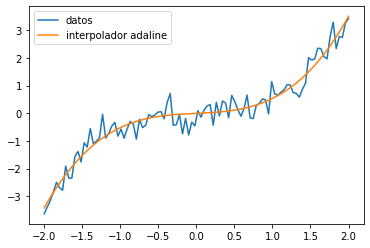

In [ ]:
interpolador_0_001 = interpolador(-0.05, 0.05, 1, 4)
interpolador_0_001.training(data_samples, 0.001, 50, lineal)
polym = interpolador_0_001.w[0]
#Plot
plt.plot(data_samples[:,0],data_samples[:,1],label='datos')

plt.plot(data_samples[:,0],poly(polym,data_samples[:,0]),label='interpolador adaline')
plt.legend()
plt.show()

### Parte 4: Demostracion

Considere la funcion de costo

$$\varepsilon(w) = \frac{1}{2} \sigma^2 - r^tw + \frac{1}{2}w^tRw $$

con $\sigma$ constante y 

$r = 
\begin{bmatrix}
0.8182 \\
0.354
\end{bmatrix}$

$R = \begin{bmatrix}
1 & 0.8182 \\
0.8182 & 1
\end{bmatrix}$

---
**(a) Encuentre el valor optimo $w$, para la cual el $\varepsilon(w)$ es minimo.**

Para $w = \begin{bmatrix}
w_1 \\
w_2
\end{bmatrix}$

$$ \varepsilon(w)= \frac{1}{2} \sigma^2 - 
\begin{bmatrix}
0.8182 & 0.354
\end{bmatrix} 
\begin{bmatrix}
w_1 \\
w_2
\end{bmatrix} + \frac{1}{2} 
\begin{bmatrix}
w_1 & w_2
\end{bmatrix}
\begin{bmatrix}
1 & 0.8182 \\
0.8182 & 1
\end{bmatrix}
\begin{bmatrix}
w_1 \\
w_2
\end{bmatrix}$$

$$ \varepsilon(w)= \frac{1}{2} \sigma^2 - (0.8182w_1 + 0.354w_2) + \frac{1}{2}
\begin{bmatrix}
w_1 + 0.8182w_2 & 0.8182w_1 + w_2
\end{bmatrix}
\begin{bmatrix}
w_1 \\
w_2
\end{bmatrix}$$

$$ \varepsilon(w)= \frac{1}{2} \sigma^2 - (0.8182w_1 + 0.354w_2) + \frac{1}{2}(w_1^2 + 0.8182w_1w_2 + 0.8182w_1w_2 + w_2^2)$$

Hallamos las primeras derivadas parciales con respecto a las componentes de $w$ para encontrar los maximos y minimos de la funcion de costo.

$$\frac{\partial \varepsilon(w)}{\partial w_1}= - 0.8182\frac{\partial w_1}{\partial w_1} - 0.354\frac{\partial w_2}{\partial w_1} + \frac{1}{2} \left (\frac{\partial w_1^2}{\partial w_1} + 2 \left (0.8182\frac{\partial w_1}{\partial w_1}w_2 + 0.8182w_1\frac{\partial w_2}{\partial w_1} \right ) + \frac{\partial w_2^2}{\partial w_1} \right )$$

$$\frac{\partial \varepsilon(w)}{\partial w_1}= - 0.8182 + w_1 + 0.8182w_2 \hspace{1cm} (1)$$

$$\frac{\partial \varepsilon(w)}{\partial w_2}= - 0.8182\frac{\partial w_1}{\partial w_2} - 0.354\frac{\partial w_2}{\partial w_2} + \frac{1}{2} \left (\frac{\partial w_1^2}{\partial w_2} + 2 \left (0.8182\frac{\partial w_1}{\partial w_2}w_2 + 0.8182w_1\frac{\partial w_2}{\partial w_2} \right ) + \frac{\partial w_2^2}{\partial w_2} \right )$$

$$\frac{\partial \varepsilon(w)}{\partial w_2}= -0.354 + 0.8182w_1 + w_2 \hspace{1cm} (2)$$

Resolvemos el sistema de ecuacion de ambas primeras derivadas parciales (1) y (2) igualando a 0 para encontrar el minimo o maximo.

\begin{cases} -0.8182 + w_1 + 0.8182w_2 = 0 \hspace{1cm} (3)
\\ -0.354 + 0.8182w_1 + w_2 = 0 \hspace{1.28cm} (4)\end{cases}

Despejamos $w_1$ en (3), sustituimos en (4) y resolvemos la ecuacion

$$-0.8182 + w_1 + 0.8182w_2 = 0$$
$\iff$
$$ w_1 = 0.8182 - 0.8182w_2$$

Sustituimos

$$-0.354 + 0.8182 (0.8182 - 0.8182w_2) + w_2 = 0$$
$\iff$
$$0.6695 - 0.6695w_2 + w_2 = 0.354$$
$\iff$
$$ w_2 (1-0.6695) = -0.3155$$
$\iff$
$$w_2 = -\frac{0.3155}{0.3305} = -0.9546$$

Reemplamos el valor de $w_2$ en $ w_1 = 0.8182 - 0.8182w_2$ y nos queda

$$ w_1 = 1.5993$$

Para saber si estos valores son maximos, minimos o puntos de inflexion buscamos las segundas derivadas parciales para calcular la matriz Hessiana

$$ \frac{\partial^2 \varepsilon(w)}{\partial w_1^2} = 1$$
$$ \frac{\partial^2 \varepsilon(w)}{\partial w_1w_2} = 0.8182$$
$$ \frac{\partial^2 \varepsilon(w)}{\partial w_2w_1} = 0.8182$$
$$ \frac{\partial^2 \varepsilon(w)}{\partial w_2^2} = 1$$

$$H(\varepsilon(w))=
\begin{bmatrix}
\frac{\partial^2 \varepsilon(w)}{\partial w_1^2} & \frac{\partial^2 \varepsilon(w)}{\partial w_1w_2} \\
\frac{\partial^2 \varepsilon(w)}{\partial w_2w_1} & \frac{\partial^2 \varepsilon(w)}{\partial w_2^2}
\end{bmatrix} = 
\begin{bmatrix}
1 & 0.8182 \\
0.8182 & 1
\end{bmatrix}$$

$$\triangle(H) = 1 - 0.6695 = 0.3305$$

Como $\triangle(H) > 0$ entonces $w = \begin{bmatrix}
1.5993 \\
-0.9546
\end{bmatrix}$ es un punto máximo o uno mínimo, pero como $\frac{\partial^2 \varepsilon(w)}{\partial w_1^2} > 0$ entonces es un mínimo global.

---

**(b) Use el metodo del descenso de gradiente para calcular el valor optimo, usando
los valores de la tasa de aprendizaje y en cada caso grafique la trayectoria de la
evolucion de los pesos $w(n)$ en el plano.**

1.   η= 0.3
2.   η=1.0

Graficas en el informe PDF


In [1]:
import numpy as np
import random 

class gradient_descent:
    def __init__(self, lowRandom, highRandom, m, n):
      # Inicializacion de la matriz de los pesos incluyendo el bias: La matriz se inicializara
      # ya traspuesta por la definicion que tiene en las dimensiones.
      self.w = np.random.uniform(low=lowRandom, high=highRandom, size=(m,n))

    def calculate(self, etha, maxEpochs, sigma, cost_function):
      cost_history = []
      w1_history = []
      w2_history = []
      i = 0
      cambio = True
      while i < maxEpochs and cambio:
        print("Epoca "+str(i+1))
        self.w[0][0] = self.w[0][0] - etha * self.partial_w1(self.w)
        self.w[1][0] = self.w[1][0] - etha * self.partial_w2(self.w)
        w1_history.append(self.w[0][0].copy())
        w2_history.append(self.w[1][0].copy())
        cost_history.append(cost_function(sigma,self.w))
        if len(cost_history) >= 2:
          if cost_history[i-1] - cost_history[i] == 0:
            cambio = False 
        i += 1
      return cost_history, [w1_history, w2_history]
    
    def partial_w1(self, w):
      return -0.8182 + w[0][0] + 0.8182 * w[1][0]
    
    def partial_w2(self, w):
      return -0.354 + 0.8182 * w[0][0] + w[1][0]

def epsilon(sigma, w):
  r = [0.8182, 0.354]
  R = [[1, 0.8182], [0.8182, 1]] 
  return ((sigma**2)/2 + - np.dot(r, w) + 1/2*np.dot(np.transpose(w),R).dot(w))[0][0]

def curva_de_nivel(x,y,sigma,costo):
  costo_total = []
  costo_momentaneo = []
  for i in range(len(x)):
    for j in range(len(y)):
      costo_momentaneo.append(cost(sigma,[[x[i][j]], [y[i][j]]]))
    costo_total.append(costo_momentaneo.copy())
    costo_momentaneo = []
  return costo_total

DESCENSO DE GRADIENTE PARA ETHA = 0.3
Epoca 1
Epoca 2
Epoca 3
Epoca 4
Epoca 5
Epoca 6
Epoca 7
Epoca 8
Epoca 9
Epoca 10
Epoca 11
Epoca 12
Epoca 13
Epoca 14
Epoca 15
Epoca 16
Epoca 17
Epoca 18
Epoca 19
Epoca 20
Epoca 21
Epoca 22
Epoca 23
Epoca 24
Epoca 25
Epoca 26
Epoca 27
Epoca 28
Epoca 29
Epoca 30
Epoca 31
Epoca 32
Epoca 33
Epoca 34
Epoca 35
Epoca 36
Epoca 37
Epoca 38
Epoca 39
Epoca 40
Epoca 41
Epoca 42
Epoca 43
Epoca 44
Epoca 45
Epoca 46
Epoca 47
Epoca 48
Epoca 49
Epoca 50
Epoca 51
Epoca 52
Epoca 53
Epoca 54
Epoca 55
Epoca 56
Epoca 57
Epoca 58
Epoca 59
Epoca 60
Epoca 61
Epoca 62
Epoca 63
Epoca 64
Epoca 65
Epoca 66
Epoca 67
Epoca 68
Epoca 69
Epoca 70
Epoca 71
Epoca 72
Epoca 73
Epoca 74
Epoca 75
Epoca 76
Epoca 77
Epoca 78
Epoca 79
Epoca 80
Epoca 81
Epoca 82
Epoca 83
Epoca 84
Epoca 85
Epoca 86
Epoca 87
Epoca 88
Epoca 89
Epoca 90
Epoca 91
Epoca 92
Epoca 93
Epoca 94
Epoca 95
Epoca 96
Epoca 97
Epoca 98
Epoca 99
Epoca 100
Pesos Finales: w_1 = 1.5969758281757689 & w_2 = -0.9523372849481114


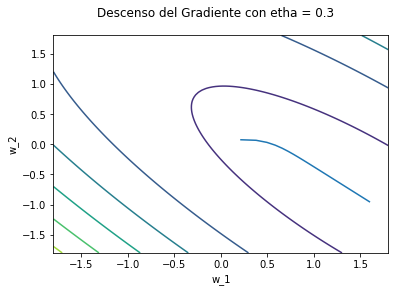

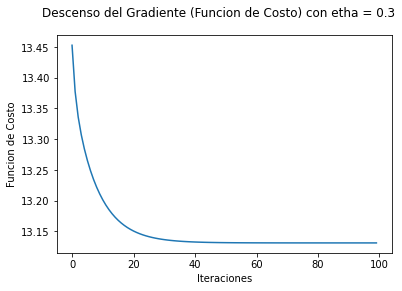

DESCENSO DE GRADIENTE PARA ETHA = 1
Epoca 1
Epoca 2
Epoca 3
Epoca 4
Epoca 5
Epoca 6
Epoca 7
Epoca 8
Epoca 9
Epoca 10
Epoca 11
Epoca 12
Epoca 13
Epoca 14
Epoca 15
Epoca 16
Epoca 17
Epoca 18
Epoca 19
Epoca 20
Epoca 21
Epoca 22
Epoca 23
Epoca 24
Epoca 25
Epoca 26
Epoca 27
Epoca 28
Epoca 29
Epoca 30
Epoca 31
Epoca 32
Epoca 33
Epoca 34
Epoca 35
Epoca 36
Epoca 37
Epoca 38
Epoca 39
Epoca 40
Epoca 41
Pesos Finales: w_1 = 1.5990293620411091 & w_2 = -0.9543258240220355


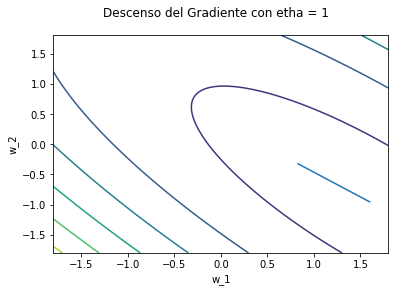

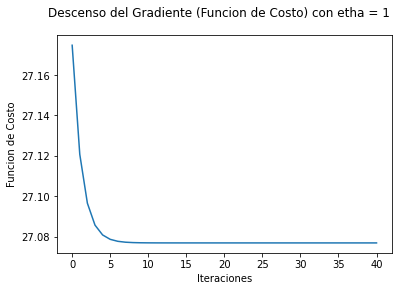

In [47]:
import matplotlib.pyplot as plt

# X, Y, Z para curvas de Nivel
xx = np.linspace(-1.8, 1.8, 100)
yy = np.linspace(-1.8, 1.8, 100)
X, Y = np.meshgrid(xx, yy)
Z = costo(X,Y,random.uniform(0,10),epsilon)

print("DESCENSO DE GRADIENTE PARA ETHA = 0.3")

gradient_descent_0_3 = gradient_descent(-0.05,0.05,2,1)
cost_history_0_3, w_history_0_3 = gradient_descent_0_3.calculate(0.3, 100, random.uniform(0,10), epsilon)

print("Pesos Finales: w_1 = "+str(gradient_descent_0_3.w[0][0]) + " & w_2 = " + str(gradient_descent_0_3.w[1][0]))
plt.ylabel("w_2")
plt.xlabel("w_1")
plt.suptitle('Descenso del Gradiente con etha = 0.3')
plt.plot(w_history_0_3[0], w_history_0_3[1])
plt.contour(X, Y, Z)
plt.show()

plt.ylabel("Funcion de Costo")
plt.xlabel("Iteraciones")
plt.suptitle('Descenso del Gradiente (Funcion de Costo) con etha = 0.3')
plt.plot(cost_history_0_3)
plt.show()

print("DESCENSO DE GRADIENTE PARA ETHA = 1")

gradient_descent_1 = gradient_descent(-0.05,0.05,2,1)
cost_history_1, w_history_1 = gradient_descent_1.calculate(1, 100, random.uniform(0,10), epsilon)

print("Pesos Finales: w_1 = "+str(gradient_descent_1.w[0][0]) + " & w_2 = " + str(gradient_descent_1.w[1][0]))
plt.ylabel("w_2")
plt.xlabel("w_1")
plt.suptitle('Descenso del Gradiente con etha = 1')
plt.plot(w_history_1[0], w_history_1[1])
plt.contour(X, Y, Z)
plt.show()

plt.ylabel("Funcion de Costo")
plt.xlabel("Iteraciones")
plt.suptitle('Descenso del Gradiente (Funcion de Costo) con etha = 1')
plt.plot(cost_history_1)
plt.show()